# Part I - (Loan Data from Prosper: Dataset Exploration)
## by (Kenny Brian)

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. For this analyses, only 15 varibles have been used.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> the data set has 81 columns and 113937 entries. we do have some null entries inthe dataset

### What is/are the main feature(s) of interest in your dataset?

> the main features of interest in the dataset are the Loan original amount and the Borrower APR(interest rate)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the following features of the dataset will help support my investigtion into the feattures of interest,'ListingKey', 'ListingCreationDate', 'CreditGrade','Term','LoanStatus','BorrowerAPR','ProsperRating (Alpha)', 'ListingCategory (numeric)',
              'EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower', 'CreditScoreRangeUpper',
              'IncomeRange', 'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment'

## Univariate Exploration



In [5]:
df_loan = df[['ListingKey', 'ListingCreationDate', 'CreditGrade','Term',
              'LoanStatus','BorrowerAPR','ProsperRating (Alpha)', 'ListingCategory (numeric)',
              'EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower', 'CreditScoreRangeUpper',
              'IncomeRange', 'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']]
df_loan.to_csv('df_loan')

In [6]:
df2 = df_loan.copy()

In [10]:
#converting the listing creation date to the correct data type
df2['ListingCreationDate'] = pd.to_datetime(df2.ListingCreationDate)
df2.ListingCreationDate.dtype

dtype('<M8[ns]')

In [11]:
# get a year from corresponding birth_date column value
df2['year'] = df2['ListingCreationDate'].dt.year

#reference: #https://www.geeksforgeeks.org/get-month-and-year-from-date-in-pandas-python/

##### which year had more borrowers? 

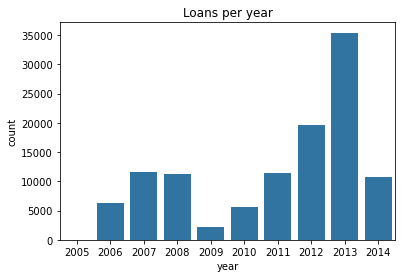

In [12]:
#visualizing the number of loans per year
base_color= sns.color_palette()[0]
sns.countplot(data=df2, x='year', color=base_color);
plt.title('Loans per year');

from the data, we can see that majority loans were issued after 2009. the latter had the least amount of loans issued, the number increased steadily peaking at 2013.

##### what is the distribution of loan original amounts?

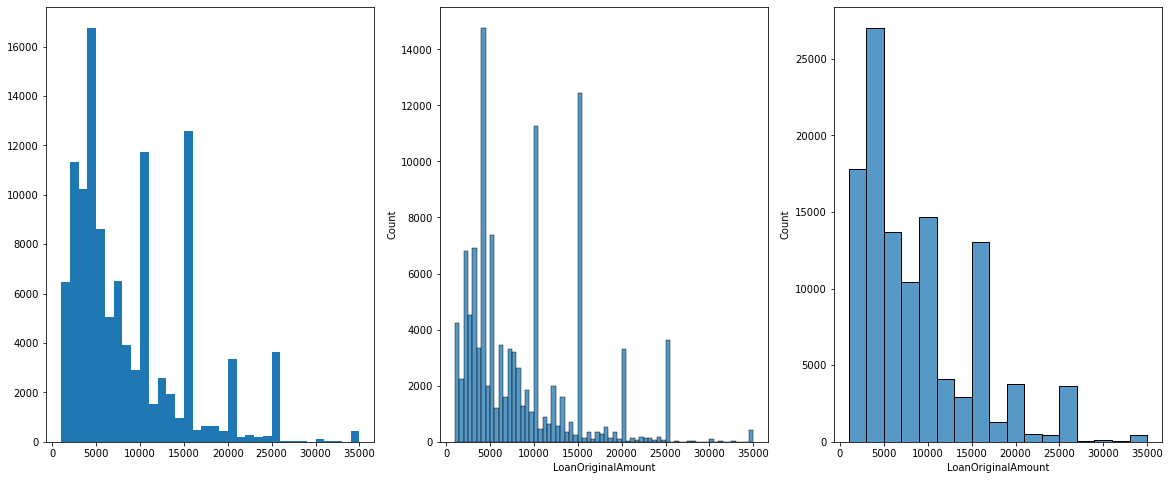

In [13]:
plt.figure(figsize=[20,8])

plt.subplot(1,3,1)
bins= np.arange(1000, df2['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(x=df2['LoanOriginalAmount'], bins=bins)

plt.subplot(1,3,2)
bins= np.arange(1000, df2['LoanOriginalAmount'].max()+500, 500)
sns.histplot(data=df2,x='LoanOriginalAmount', bins=bins)

plt.subplot(1,3,3)
bins= np.arange(1000, df2['LoanOriginalAmount'].max()+2000, 2000)
sns.histplot(data=df2, x='LoanOriginalAmount', bins=bins);

The distribution of loan amounts is skewed to the right. there are peaks at **$5000, $10000, $15000, $ 20000 and $25000**

##### what is the distribution of loan original amounts?

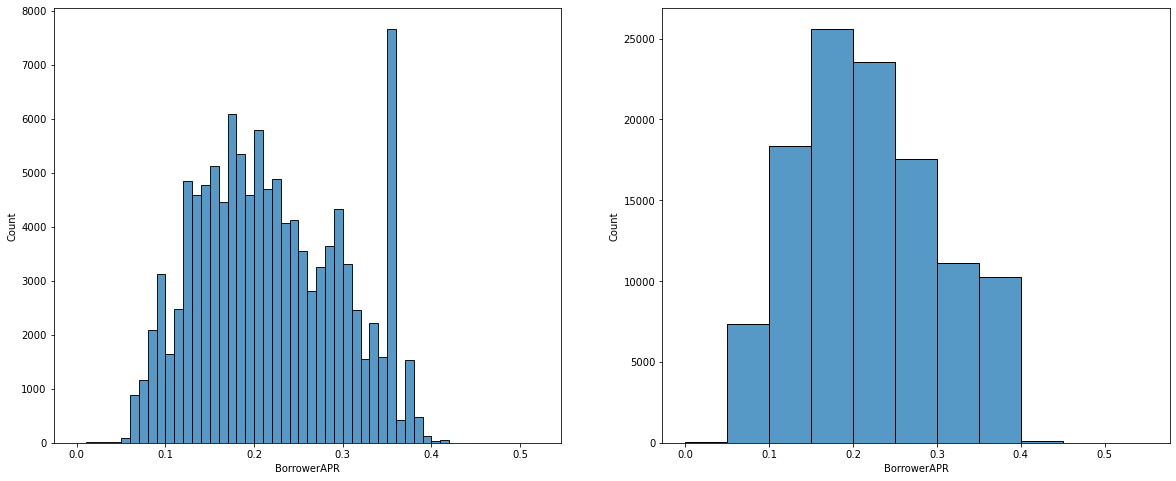

In [38]:
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
bins_edges= np.arange(0, df2['BorrowerAPR'].max()+0.01,0.01)
sns.histplot(data=df2, x='BorrowerAPR', bins=bins_edges)

plt.subplot(1,2,2)
bins_edges= np.arange(0, df2['BorrowerAPR'].max()+0.05,0.05)
sns.histplot(data=df2, x='BorrowerAPR', bins=bins_edges);

The borrowerAPR is normally distributed. using smaller bins shows a peak at around 0.36

##### what is the distribution of loan per term?

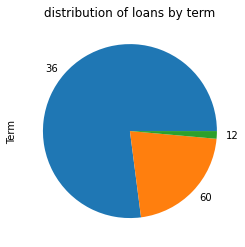

In [18]:
#sns.countplot(data=df2, x='Term', color=base_color);
df2.Term.value_counts(normalize=True).plot.pie()
plt.title('distribution of loans by term');

We can see that most of the loans had a term of 36 months. only a few had a term of 12 months

##### what is the distribution of loan per employment?

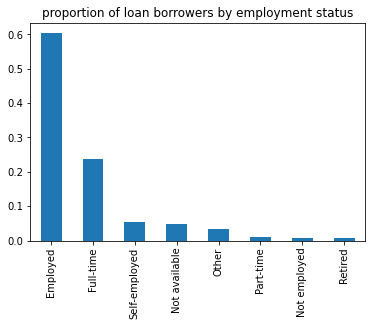

In [17]:
df2.EmploymentStatus.value_counts(normalize=True).plot.bar()
plt.title('proportion of loan borrowers by employment status');

Majority of the Loan borrowers ,approximately 60%, were employed

##### what is the distribution of loan per income range?

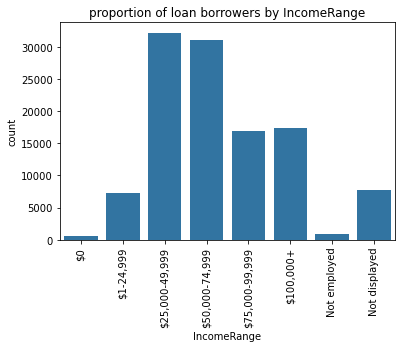

In [14]:
bands= ['$0','$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+','Not employed','Not displayed']

sns.countplot(x=df['IncomeRange'],color=base_color,order=bands)
plt.title('proportion of loan borrowers by IncomeRange')
plt.xticks(rotation=90);

we can see that majority of the loan borrowers falls under the income range of 25,000-49,999 closely followed by those in the range 50,000-74,999.

##### what was the major reason for borrowing?

In [15]:
df2['ListingCategory'] = df2['ListingCategory (numeric)'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                                                  ['Not Available', 'Debt Consolidation', 'Home Improvement', 
                                                                   'Business','Personal Loan','Student Use',
                                                                   'Auto', 'Other','Baby&Adoption','Boat','Cosmetic Procedure',
                                                                   'Engagement Ring', 'Green Loans','Household Expenses',
                                                                   'Large Purchases','Medical/Dental','Motorcycle','RV','Taxes',
                                                                   'Vacation','Wedding Loans'])

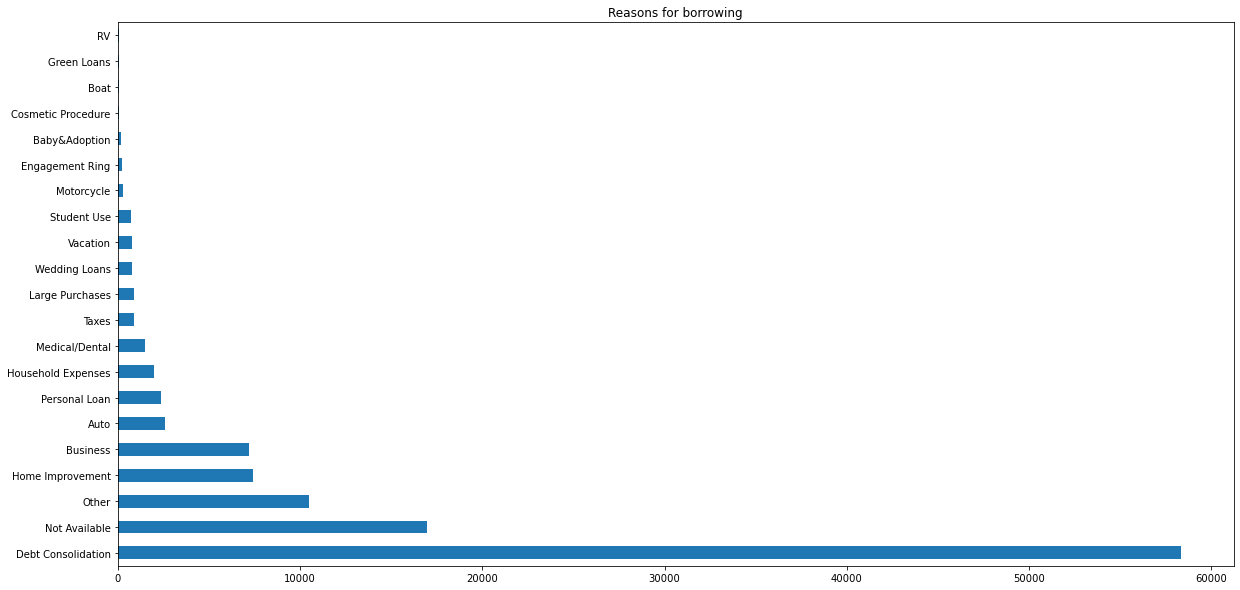

In [16]:
plt.figure(figsize=[20,10])
df2['ListingCategory'].value_counts().plot.barh()
plt.title('Reasons for borrowing');

Majority of the borrowers listed Debt consolidations the reason for borrowing, we can note that most of the borrowers did not indicate the reason for borrowing while the third, fourth and fifth reasonsfor borrowing were other, home improvement and business respectively.

##### what is the distribution of mean credit scores?

In [18]:
#create a new variable mean cedit score
df2['MeanCreditScore'] = ((df2.CreditScoreRangeLower + df2.CreditScoreRangeUpper)/2)
#Drop the upper and lower creit score range
df2.drop(columns=['CreditScoreRangeLower','CreditScoreRangeUpper'], inplace = True)

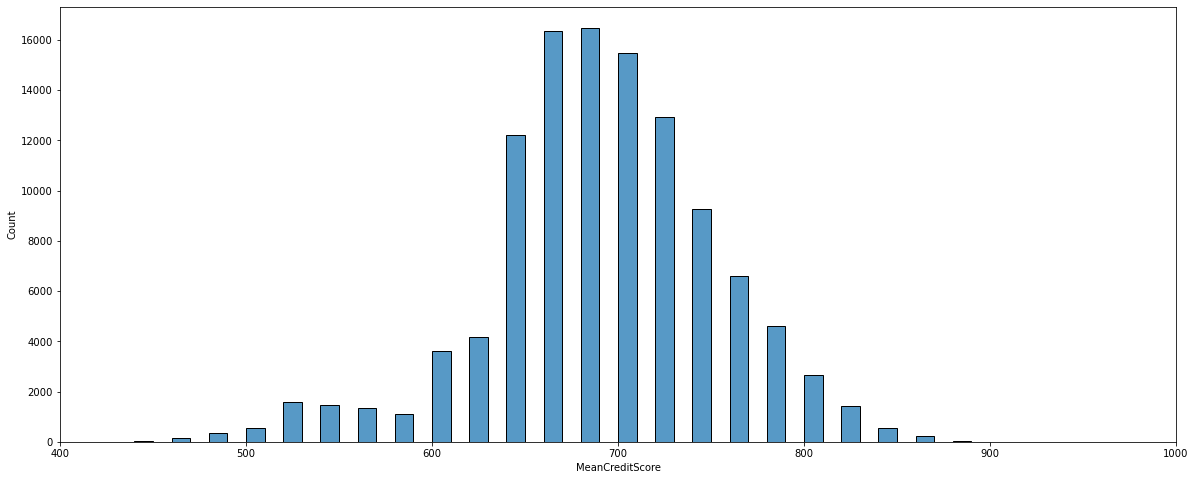

In [19]:
plt.figure(figsize=[20,8])

bin_edges = np.arange(0, df2['MeanCreditScore'].max()+10, 10)
sns.histplot(data=df2, x='MeanCreditScore', bins=bin_edges)
plt.xlim(400,1000);

In [36]:
df2.loc[df2['MeanCreditScore']== 9.5].EmploymentStatus.value_counts()

Not available    101
Name: EmploymentStatus, dtype: int64

the mean credit score is skewed to the right with the peak score at around 700. the seems to be outliers with a mean credit score of 9.5.

##### what is the distribution of loans by the status?

Text(0.5, 1.0, 'Distribution of loans by status')

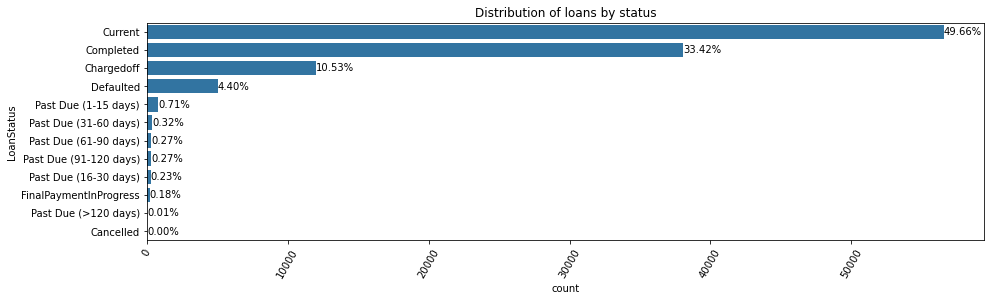

In [20]:
type_counts = df2.LoanStatus.value_counts()
order_type = type_counts.index
n=df2['LoanStatus'].value_counts().sum()

plt.figure(figsize=[15,4])
sns.countplot(y=df2['LoanStatus'], color=base_color, order = order_type)
plt.xticks(rotation=60);
#annotation
for i in range (type_counts.shape[0]):
    count = type_counts[i]
    string = '{:0.2f}%'.format((count/n)*100)
    plt.text(count+1, i, string, va='center')
    
plt.title('Distribution of loans by status')

Majority of the loans are current (49.66%) while 33.42% are completed. However, 10.53% & and 4.4% of the loans have been charged off and defaulted respectively.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of loan amounts is skewed to the right. there are peaks at **$5000, $10000, $15000, $ 20000 and $25000**. majority of the loan borrowers falls under the income range of 25,000-49,999 closely followed by those in the range 50,000-74,999. The mean credit score is skewed to the right with the peak score at around 700. there seems to be outliers with a mean credit score of 9.5(these listed their income as not available or were NAN).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I changed the data type for `Listcreationdate` to datetime. I create a new variable `year` in order to visualize the distribution of loans over the years. I also created a new variable mean cedit score by getting the means between the `CreditScoreRangeLower` & `CreditScoreRangeUpper`. 

## Bivariate Exploration


##### How does the BorrowerAPR correlate to MeanCreditScore?

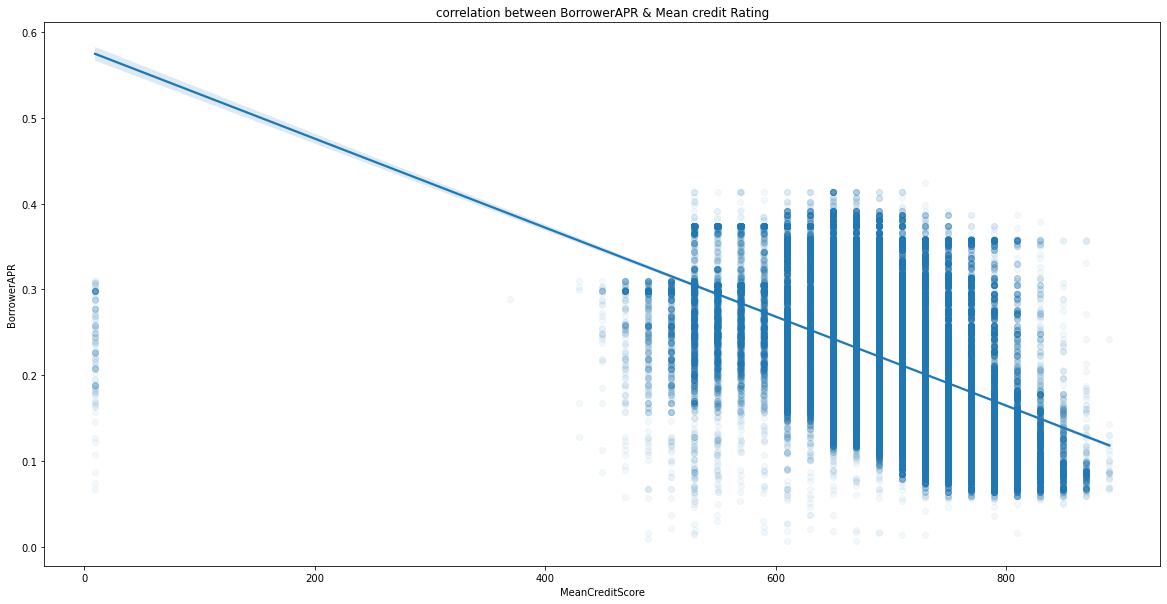

In [38]:
plt.figure(figsize =(20,10))
           
sns.regplot(data=df2, y= 'BorrowerAPR', x='MeanCreditScore', x_jitter=0.1, scatter_kws={'alpha':1/20})
plt.title('correlation between BorrowerAPR & Mean credit Rating');

There is a negative correlation between BorrowerAPR & Mean credit Rating. AS the Mean credit Rating increases, the  BorrowerAPR  decreases

##### How does the BorrowerAPR correlate with LoanOriginalAmount?

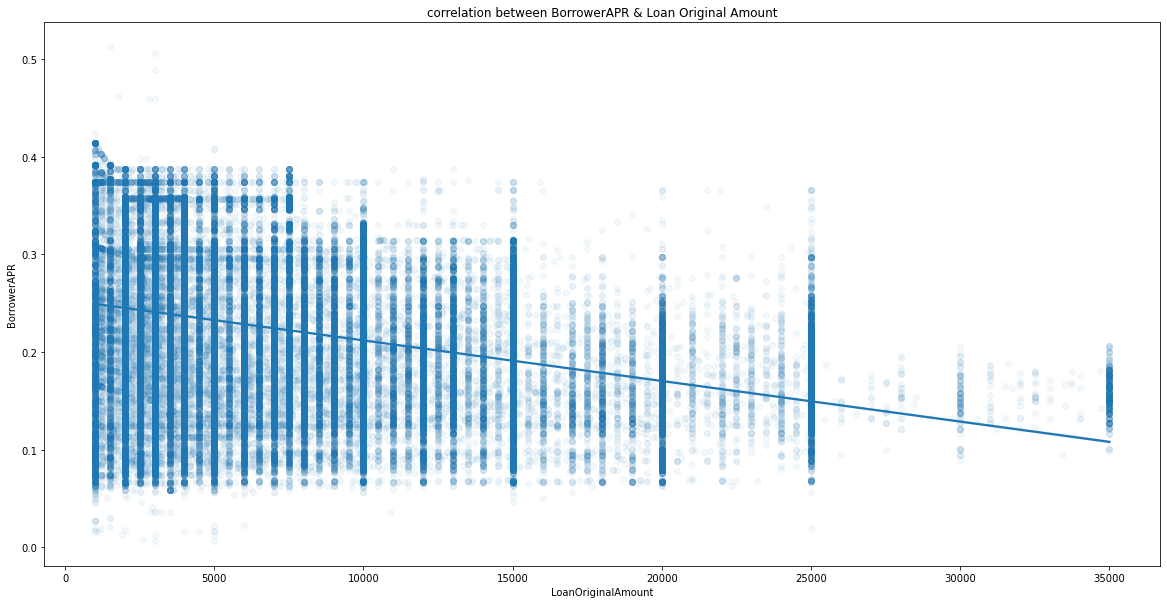

In [23]:
plt.figure(figsize =(20,10))
           
sns.regplot(data=df2, x='LoanOriginalAmount', y= 'BorrowerAPR', x_jitter=0.1, scatter_kws={'alpha':1/20})
plt.title('correlation between BorrowerAPR & Loan Original Amount');

There is a negative correlation between BorrowerAPR & Loan Original Amount. Higher loan amounts have a lowere interest rate

##### How does the MeanCreditScore correlate with LoanOriginalAmount?

(400.0, 1000.0)

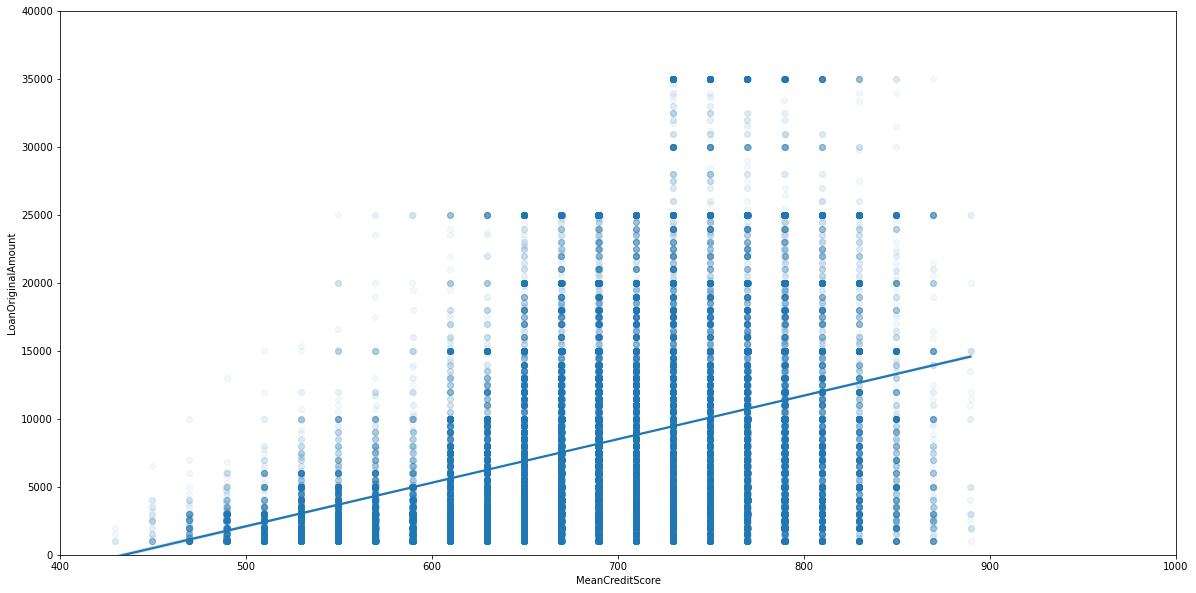

In [41]:
plt.figure(figsize =(20,10))
           
sns.regplot(data=df2, y='LoanOriginalAmount', x= 'MeanCreditScore', x_jitter=0.1, scatter_kws={'alpha':1/20})
#limit the y axes to start at zero
plt.ylim(0,40000)
#limiting the x axis to start from 400
plt.xlim(400,1000)
plt.title('correlation between mean credit score & Loan Original Amount');

There is a positive correlation between mean credit score and loan original amount. borrowers with a higher mean credit score have relatively higher loan amounts

##### How does the IncomeRange relate with LoanOriginalAmount?

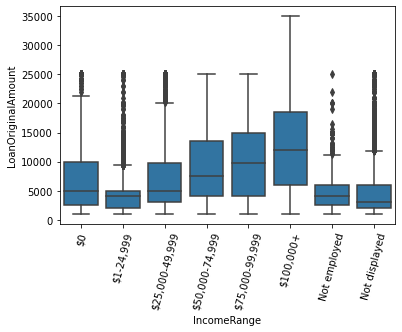

In [45]:
base_color = sns.color_palette()[0]
bands= ['$0','$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+','Not employed','Not displayed']
sns.boxplot(data=df2, x='IncomeRange', y='LoanOriginalAmount', color=base_color, order =bands)
plt.xticks(rotation=75);

From the fist income range of 1-24999 the loan amounts increases steadily up to the top range of 100000. Those within the 100000 income range had the highest LoanOrignationamount. suprisingly, borrowers with an income of 0 had relatively higher loan amounts compared to those in the range 1-24999

##### How does the Borrower APR compare for the different employment status?

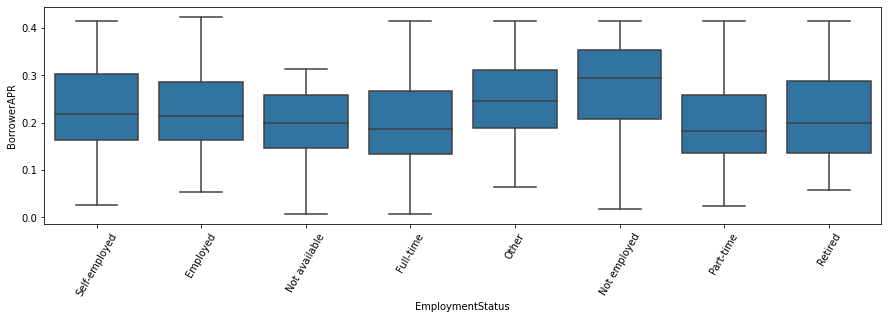

In [30]:
base_color = sns.color_palette()[0]

plt.figure(figsize=[15,4])
sns.boxplot(data=df2, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=60);

Generally, those stated being in full time and part time employment had a relatively low interest rates on their loans as compared to those stated that they were unemployed

##### How does the IncomeRange compare with home ownership?

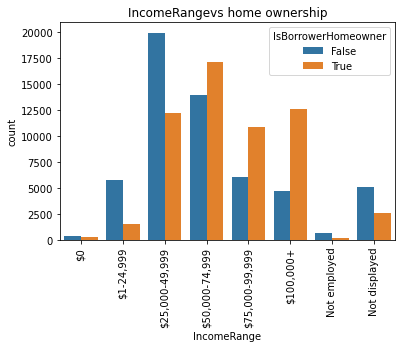

In [56]:
bands= ['$0','$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+','Not employed','Not displayed']
sns.countplot(data=df2, x='IncomeRange', hue = 'IsBorrowerHomeowner', order =bands)
plt.xticks(rotation=90)
plt.title('IncomeRange vs home ownership');

More borrowers in the lower income bands ( 0,1−24,999, 25,000-49,999) and those who we not employed or did not display the income did not own homes. On the other hand, more borrowers in the higher income bands ( 50,000−74,999, 75,000-99,999, $100,000+) reported owning homes

##### How does the  LoanOriginalAmount between home owner and non homeowners?

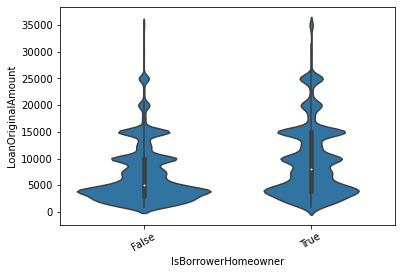

In [49]:
sns.violinplot(data=df2, x='IsBorrowerHomeowner', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=30);

Home owners had a relatively higher loan original amount compared to non home owners

##### How does the  BorrowerAPR between home owner and non homeowners?

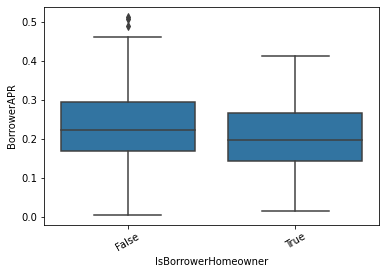

In [50]:
sns.boxplot(data=df2, x='IsBorrowerHomeowner', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=30);

Non-home owners had higher loan interest rates compared to homeowners

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a positive correlation between mean credit score and loan original amount. borrowers with a higher mean credit score have relatively higher loan amounts. However, there is negative correlation between BorrowerAPR & Loan Original Amount, and BorrowerAPR & Lmean credit rating.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> More borrowers in the lower income bands ($0,1-24,999, $25,000-49,999) and those who we not employed or did not display the income did not own homes. On the other hand, more borrowers in the higher income bands ($50,000-74,999,$75,000-99,999, $100,000+) reported owning homes

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

##### How does the  correlation between MeanCreditScore and  LoanOriginalAmount compare between home owner and non homeowners?

(400.0, 1000.0)

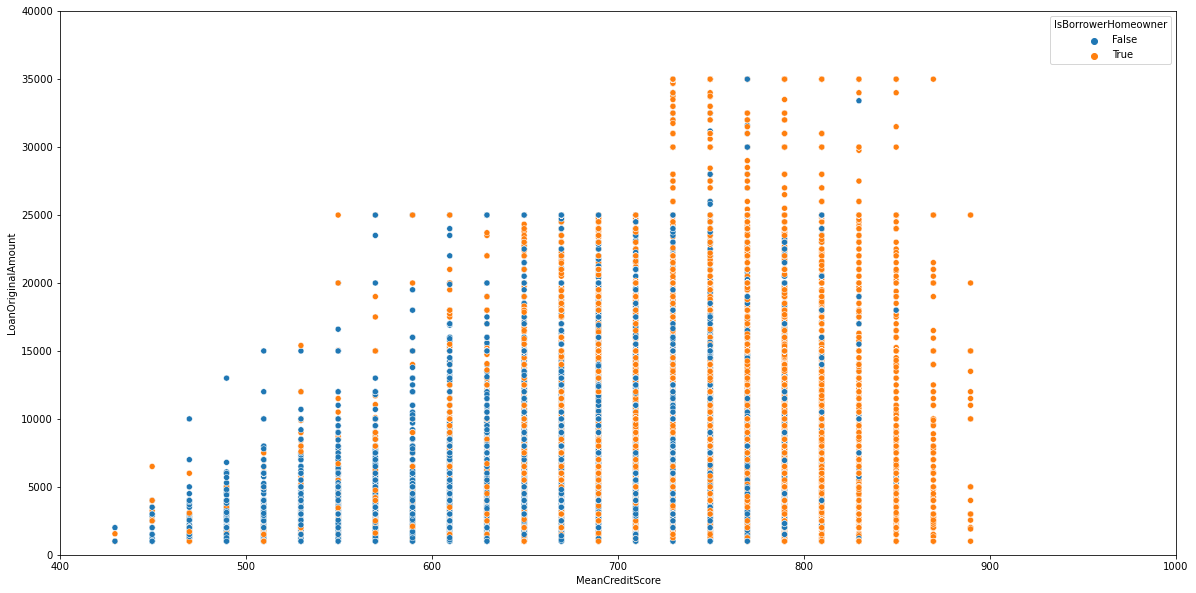

In [57]:
plt.figure(figsize =(20,10))
           
sns.scatterplot(data=df2, x= 'MeanCreditScore', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', x_jitter=0.1)
#limit the y axes to start at zero
plt.ylim(0,40000)
#limiting the x axis to start from 400
plt.xlim(400,1000);

Home owners were more likely to have a higher credit score and higher loan original amount compared to non home owners

##### How does the  correlation between MeanCreditScore and  LoanOriginalAmount compare between home owner and non homeowners?

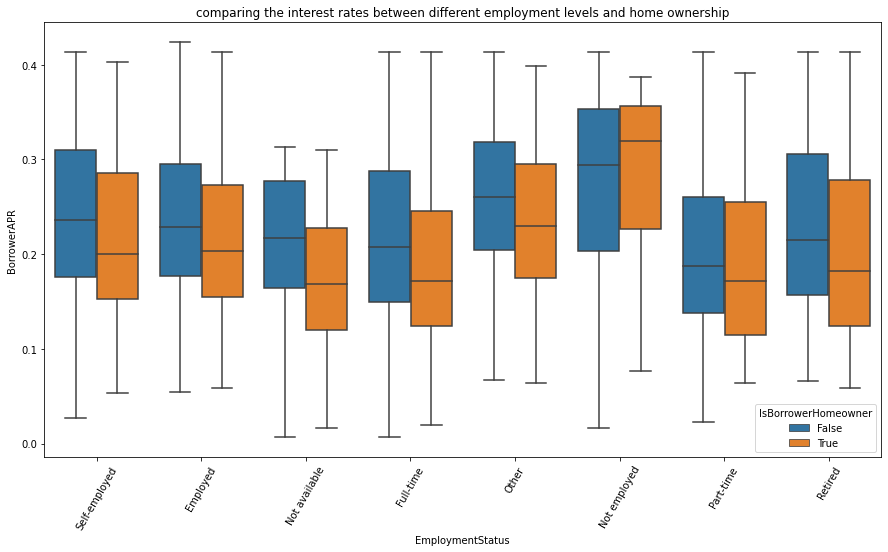

In [34]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df2, x='EmploymentStatus', y='BorrowerAPR', hue='IsBorrowerHomeowner')
plt.xticks(rotation=60)
plt.title('comparing the interest rates between different employment levels and home ownership');

Generally, home owners had relatively low interest rates compared to non homeowners across all employments levels except those that stated that they were not employed. for the latter, home owners had a relatively higher interest rates compared to none home owners

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Home owners were more likely to have a higher credit score and higher loan original amount compared to non home owners

### Were there any interesting or surprising interactions between features?

> while the interest rates were generally lower for home owners across all employment levels, home owners who reported being non employed had a relatively higher interest rates compared to none home owners

## Conclusions
>converted the listing creation date to the correct data type, got a year from corresponding birth_date column value and plotted the loans issued for all years. from the data, we can see that majority loans were issued after 2009. the latter had the least amount of loans issued, the number increased steadily peaking at 2013.

>The distribution of loan amounts is skewed to the right. there are peaks at 5000, 10000, 15000, 20000 and 25000.

>The borrowerAPR is normally distributed. using smaller bins shows a peak at around 0.36

>We can see that most of the loans had a term of 36 months. only a few had a term of 12 months

>Majority of the Loan borrowers ,approximately 60%, were employed

>Majority of the borrowers listed Debt consolidations the reason for borrowing, we can note that most of the borrowers did not indicate the reason for borrowing while the third, fourth and fifth reasonsfor borrowing were other, home improvement and business respectively.

> the mean credit score is skewed to the right with the peak score at around 700. the seems to be outliers with a mean credit score of 9.5. all those in the latter category indicated not available

>There is a negative correlation between BorrowerAPR & Mean credit Rating. AS the Mean credit Rating increases, the  BorrowerAPR  decreases

>There is a negative correlation between BorrowerAPR & Loan Original Amount. Higher loan amounts have a lowere interest rate

>There is a positive correlation between mean credit score and loan original amount. borrowers with a higher mean credit score have relatively higher loan amounts

>From the fist income range of 1-24999 the loan amounts increases steadily up to the top range of 100000. Those within the 100000 income range had the highest LoanOrignationamount. suprisingly, borrowers with an income of 0 had relatively higher loan amounts compared to those in the range 1-24999

>Generally, those stated being in full time and part time employment had a relatively low interst rates on their loans as compared to those stated that they were unemployed

> Non-home owners had higher loan interest rates compared to homeowners

>Home owners were more likely to have a higher credit score and higher loan original amount compared to non home owners

>Generally, home owners had relatively low interest rates compared to non homeowners across all employments levels except those that stated that they were not employed. for the latter, home owners had a relatively higher interest rates compared to none home owners